In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import itertools
from scipy.stats import pearsonr

from fit import get_expectations_carrabin
palette = sns.color_palette('tab10')
sns.set_palette(palette)
sns.set(context='paper', style='white', font="cmr10", font_scale=1.2)
plt.rcParams['axes.formatter.use_mathtext'] = True

### Model Performance (abs_qid_loss)

/tmp/ipykernel_19107/3194753327.py:12: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.boxplot(combined, x='type', y='loss', hue='type', ax=ax, palette=palette[:5], notch=False, width=0.5)


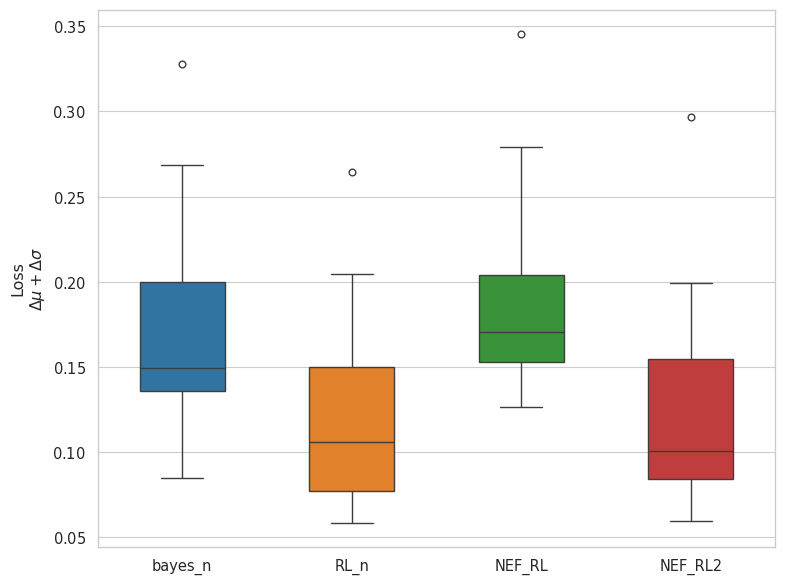

In [18]:
bayes_n = pd.read_pickle("data/bayes_n_carrabin_feb12_performance.pkl")
rl_n = pd.read_pickle("data/RL_n2_carrabin_feb12_performance.pkl")
nef_rl = pd.read_pickle("data/NEF_RL_carrabin_feb12_performance.pkl")
nef_rl2 = pd.read_pickle("data/NEF_RL_carrabin_feb17_performance.pkl")
rl_n['type'] = "RL_n"
nef_rl['loss'] = nef_rl['RMSE']
nef_rl2['type'] = "NEF_RL2"
combined = pd.concat([bayes_n, rl_n, nef_rl, nef_rl2], ignore_index=True)

with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6), sharex=True, sharey='row')
    sns.boxplot(combined, x='type', y='loss', hue='type', ax=ax, palette=palette[:5], notch=False, width=0.5)
    ax.set(xlabel=None, ylabel='Loss\n'+'$\Delta \mu + \Delta \sigma$') 
    plt.tight_layout()
    fig.savefig("plots/carrabin_performance.jpg", dpi=600)

In [17]:
rln_performance = pd.read_pickle("data/RL_n2_carrabin_feb12_performance.pkl")
rln_params = pd.read_pickle("data/RL_n2_carrabin_feb12_params.pkl")
print(rln_performance)
print(rln_params)

     type  sid      loss
0   RL_n2    1  0.065837
1   RL_n2    2  0.083107
2   RL_n2    3  0.092539
3   RL_n2    4  0.264362
4   RL_n2    5  0.076512
5   RL_n2    6  0.149847
6   RL_n2    7  0.204686
7   RL_n2    8  0.183002
8   RL_n2    9  0.106084
9   RL_n2   10  0.111983
10  RL_n2   11  0.106100
11  RL_n2   12  0.123722
12  RL_n2   13  0.195400
13  RL_n2   14  0.095973
14  RL_n2   15  0.058430
15  RL_n2   16  0.177258
16  RL_n2   17  0.077199
17  RL_n2   18  0.075033
18  RL_n2   19  0.077837
19  RL_n2   20  0.076288
20  RL_n2   21  0.106888
     type  sid        mu     sigma
0   RL_n2    1  0.148405  0.036854
1   RL_n2    2  0.252626  0.055038
2   RL_n2    3  0.180294  0.022825
3   RL_n2    4  0.404855  0.174151
4   RL_n2    5  0.172628  0.102807
5   RL_n2    6  0.325853  0.063533
6   RL_n2    7  0.051130  0.056384
7   RL_n2    8  0.322492  0.136752
8   RL_n2    9  0.224014  0.028732
9   RL_n2   10  0.093947  0.071101
10  RL_n2   11  0.180957  0.047266
11  RL_n2   12  0.227716  0.08

In [20]:
nef_rl2_performance = pd.read_pickle("data/NEF_RL_carrabin_feb17_performance.pkl")
nef_rl2_params = pd.read_pickle("data/NEF_RL_carrabin_feb17_params.pkl")
print(nef_rl2_performance)
print(nef_rl2_params)

      type  sid      loss
0   NEF_RL    1  0.062916
1   NEF_RL    2  0.092698
2   NEF_RL    3  0.093161
3   NEF_RL    4  0.296895
4   NEF_RL    5  0.084453
5   NEF_RL    6  0.154508
6   NEF_RL    7  0.188656
7   NEF_RL    8  0.197817
8   NEF_RL    9  0.111348
9   NEF_RL   10  0.111044
10  NEF_RL   11  0.098151
11  NEF_RL   12  0.128217
12  NEF_RL   13  0.199157
13  NEF_RL   14  0.100716
14  NEF_RL   15  0.059441
15  NEF_RL   16  0.172585
16  NEF_RL   17  0.083935
17  NEF_RL   18  0.080600
18  NEF_RL   19  0.085241
19  NEF_RL   20  0.069516
20  NEF_RL   21  0.107922
      type  sid    mu  n_error
0   NEF_RL    1  0.18      400
1   NEF_RL    2  0.36      170
2   NEF_RL    3  0.23      460
3   NEF_RL    4  1.00       80
4   NEF_RL    5  0.28       70
5   NEF_RL    6  0.61      200
6   NEF_RL    7  0.07      100
7   NEF_RL    8  1.00       50
8   NEF_RL    9  0.31      430
9   NEF_RL   10  0.13      100
10  NEF_RL   11  0.22      240
11  NEF_RL   12  0.34      130
12  NEF_RL   13  0.67    